# Analise de Dados de Filmes Exibidos no Brasil de 2009 a 2017
Com base nos dados da Ancine (https://oca.ancine.gov.br/cinema) vamos analisar os filmes exibidos no Brasil

In [63]:
# importando as bibliotecas
import pandas as pd
# configurando o matplolib
%matplotlib inline

In [64]:
# criar o DataFrame com base no arquivo Excel
# precisamos pular as 2 primeiras linhas (skiprows)
# descartar as ultimas 16 linhas (skipfooter)
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Curso LABHacker/Dados/2120_0.xlsx', skiprows=2, skipfooter=16)

In [65]:
# exibindo as 5 primeiras linhas do DataFrame
df.head()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2017,#Screamers,Ficção,Estados Unidos,Estrangeiros,2017-11-30 00:00:00,Cineart Filmes,Distribuição Nacional,714,9437.45
1,2017,10 Centavos para o Número da Besta,Documentário,Brasil,Brasileiros,2017-11-28 00:00:00,Ponto de Equilíbrio,Distribuição Nacional,7,63.00
2,2017,120 batimentos por minuto,Ficção,França,Estrangeiros,2018-01-04 00:00:00,Imovision,Distribuição Nacional,262,3791.63
3,2017,13 Minutos,Ficção,Alemanha,Estrangeiros,2016-11-03 00:00:00,Alphaville Filmes,Distribuição Nacional,620,6463.50
4,2017,150 Miligramas,Ficção,França,Estrangeiros,2017-08-31 00:00:00,Califórnia,Distribuição Nacional,771,10508.71


In [66]:
# exibindo as 5 ultimas linhas do DataFrame
df.tail()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
5686,2009,X-Men Origens: Wolverine,Ficção,Estados Unidos,Estrangeiros,2009-05-01 00:00:00,Fox,Distribuição Internacional,3199434,27352313.00
5687,2009,Xuxa em o Mistério de Feiurinha,Ficção,Brasil,Brasileiros,2009-12-25 00:00:00,Playarte,Distribuição Nacional,250109,1766416.65
5688,2009,Xuxa em Sonho de Menina,Ficção,Brasil,Brasileiros,2007-12-21 00:00:00,Warner,Distribuição Internacional,8914,26880.00
5689,2009,Xuxa Gêmeas,Ficção,Brasil,Brasileiros,2006-12-15 00:00:00,Fox,Distribuição Internacional,1671,5013.00
5690,2009,Zico na Rede,Documentário,Brasil,Brasileiros,2009-07-03 00:00:00,Business Telecom,Distribuição Nacional,546,2529.50


In [67]:
# verificar todos os tipos das colunas
df.dtypes

Ano de exibição                      int64
Título da obra                      object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [68]:
# vamos tentar identificar o problema da coluna 'data de lançamento'
# relançamento é lixo por isso o erro dado na celula anterior
df['Data de lançamento'].value_counts()

Relançamento           175
2015-12-03 00:00:00     33
2012-12-21 00:00:00     33
2013-11-29 00:00:00     29
2012-11-02 00:00:00     27
                      ... 
2006-12-15 00:00:00      1
2010-05-08 00:00:00      1
2017-11-28 00:00:00      1
2008-11-29 00:00:00      1
2018-01-18 00:00:00      1
Name: Data de lançamento, Length: 759, dtype: int64

In [69]:
# exibir alguns filmes que estão com data = Relançamento
df[df['Data de lançamento'] == 'Relançamento'].head()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
7,2017,8½,Ficção,"França, Itália",Estrangeiros,Relançamento,F. J. Cines,Distribuição Nacional,29,196.00
11,2017,A bela da tarde,Ficção,"França, Itália",Estrangeiros,Relançamento,Zeta Filmes,Distribuição Nacional,3011,42839.31
36,2017,A História sem Fim,Ficção,"Alemanha, Estados Unidos",Estrangeiros,Relançamento,F. J. Cines,Distribuição Nacional,797,6969.00
53,2017,A primeira noite de um homem,Ficção,Estados Unidos,Estrangeiros,Relançamento,Zeta Filmes,Distribuição Nacional,12,96.00
128,2017,Ballet Bolshoi: A bela adormecida,Vídeomusical,Inglaterra,Estrangeiros,Relançamento,UCI,Distribuição Nacional,1504,41391.00


## Decisão sobre dados incorretos

In [70]:
# mostra o tamanho do nosso DataFrame e seu formato é (linhas, colunas)
df.shape

(5691, 10)

In [71]:
# criar um novo DataFrame sem os relançamentos
df_novo = df[df['Data de lançamento'] != 'Relançamento'].copy()

In [72]:
# vamos verificar os tipos das colunas
df_novo.dtypes

Ano de exibição                      int64
Título da obra                      object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [73]:
# converter a coluna 'Data de lançamento' para datetime
df_novo['Data de lançamento'] = pd.to_datetime(df_novo['Data de lançamento'])

In [74]:
df_novo.dtypes

Ano de exibição                             int64
Título da obra                             object
Gênero                                     object
País(es) produtor(es) da obra              object
Nacionalidade da obra                      object
Data de lançamento                 datetime64[ns]
Distribuidora                              object
Origem da empresa distribuidora            object
Público no ano de exibição                  int64
Renda (R$) no ano de exibição             float64
dtype: object

In [75]:
df_novo.head(2)

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2017,#Screamers,Ficção,Estados Unidos,Estrangeiros,2017-11-30,Cineart Filmes,Distribuição Nacional,714,9437.45
1,2017,10 Centavos para o Número da Besta,Documentário,Brasil,Brasileiros,2017-11-28,Ponto de Equilíbrio,Distribuição Nacional,7,63.00


In [76]:
# quais os anos tiveram mais filmes lançados?
df_novo['Data de lançamento'].dt.year.value_counts()

2013    669
2015    646
2014    619
2016    613
2011    553
2012    539
2009    503
2017    487
2010    475
2008    225
2007     61
2006     49
2005     29
2018     17
2004     10
2002      6
2001      5
2003      4
1999      3
2000      2
1998      1
Name: Data de lançamento, dtype: int64

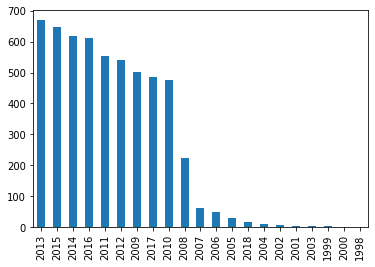

In [77]:
# vamos plotar o gráfico com os lançamentos por ano
df_novo['Data de lançamento'].dt.year.value_counts().plot.bar()

In [78]:
# qual o filme com maior bilheteria?
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].max()]

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
2249,2015,Vingadores: A Era de Ultron,Ficção,Estados Unidos,Estrangeiros,2015-04-23,Disney,Distribuição Internacional,10129071,146184931.0


In [79]:
# 3 filmes com maior bilheteria
df_novo.nlargest(3, 'Renda (R$) no ano de exibição')

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
2249,2015,Vingadores: A Era de Ultron,Ficção,Estados Unidos,Estrangeiros,2015-04-23,Disney,Distribuição Internacional,10129071,1.461849e+08
893,2016,Capitão América: Guerra civil,Ficção,Estados Unidos,Estrangeiros,2016-04-28,Disney,Distribuição Internacional,9617572,1.433370e+08
2242,2015,Velozes e Furiosos 7,Ficção,Estados Unidos,Estrangeiros,2015-04-02,Universal,Distribuição Internacional,9857946,1.424659e+08


In [80]:
# qual o filme com menor bilheteria?
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].min()]

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
2277,2014,A Batalha do passinho,Documentário,Brasil,Brasileiros,2013-10-11,Cine Santa Teresa,Distribuição Nacional,355,0.0
2608,2014,Mar negro,Ficção,Brasil,Brasileiros,2014-01-17,Petrini,Distribuição Nacional,0,0.0
2728,2014,O Último Lance do Leilão,Ficção,Brasil,Brasileiros,2014-05-01,Sam Rádio Pictures,Distribuição Nacional,0,0.0
3041,2013,As horas vulgares,Ficção,Brasil,Brasileiros,2013-08-09,Petrini,Distribuição Nacional,0,0.0
3058,2013,Beije-me outra vez,Ficção,Itália,Estrangeiros,2013-05-10,Petrini,Distribuição Nacional,0,0.0
3105,2013,Crazy Horse,Ficção,Estados Unidos,Estrangeiros,2013-06-28,Petrini,Distribuição Nacional,0,0.0
3390,2013,Quase um tango,Ficção,Brasil,Brasileiros,2013-08-16,NGM Produções,Distribuição Nacional,0,0.0
3459,2013,Todos os Dias,Ficção,Reino Unido,Estrangeiros,2014-01-24,Esfera Produções,Distribuição Nacional,0,0.0
3603,2012,Apenas entre Nós,Ficção,"França, Eslovênia, Sérvia, Croácia",Estrangeiros,2015-05-07,Lume,Distribuição Nacional,0,0.0
3627,2012,Ataque ao prédio,Ficção,Reino Unido,Estrangeiros,2012-01-13,Sony,Distribuição Internacional,0,0.0


In [81]:
# quantos filmes brasileiros e estrangeiros
df_novo['Nacionalidade da obra'].value_counts()

Estrangeiros    3902
Brasileiros     1614
Name: Nacionalidade da obra, dtype: int64